Overview:

I chose the "Melbourne Housing" data set. The data set contains a variety of fields.  For my analysis, I chose the: "Rooms", "Price", "Distance", "Bedroom", "Bathroom", "Car", "Landsize" and "BuildingArea" features. The goal of this analysis is to build two Decsion Trees and one Random Forest to solve a particular    Regression task. In my case, the task is to predict house prices based on the predictor variables mentioned above. For my first Decision Tree model, I will utilize the: "Rooms", "Car" and "Landsize" features to predict house prices. For my second Decision Tree model,I will switch the features and utilize the: "Distance", "Bedroom" and "BuildingArea" features to predict house prices. For my Random Forest model, I will utilize all of the features mentioned above ("Rooms", "Distance", "Bedroom", "Bathroom", "Car", "Landsize" and "BuildingArea") to predict house prices. It is important to note that I displayed the second tree (rf_model.estimators_[1]) from my Random Forest model. Once all of the models are built, I will compare their performance (variance and bias).Below are the feature definitions of the "Melbourne Housing" data set:

1). Rooms: Number of Rooms in a house </br>
2). Price: The price of a house</br>
3). Distance: The distance from the Central Business District in Kilometers</br>
4). Bedroom: The number of bedrooms in a house</br>
5). Bathroom: The number of bathrooms in a house</br>
6). Car: The number of car spots in a house</br>
7). Landsize: The size of the land where the house stands on in square meters</br>
8). Building Area: The total area of the house calculated on a floor by floor basis in square meters</br>

The Melbourne data set has been taken from Kaggle: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot


1). Exploratory Analysis:



              Suburb           Address  Rooms Type    Price Method   SellerG  \
0         Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  

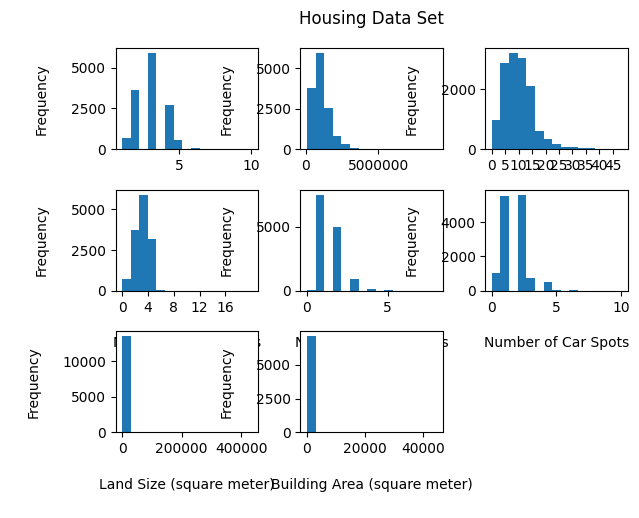

C:\Users\Staff\AppData\Local\Temp\ipykernel_17072\40521099.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(np.arange(0, 40, 4))
C:\Users\Staff\AppData\Local\Temp\ipykernel_17072\40521099.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(np.arange(0, 20, 2))
C:\Users\Staff\AppData\Local\Temp\ipykernel_17072\40521099.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(np.arange(0, 900, 100))


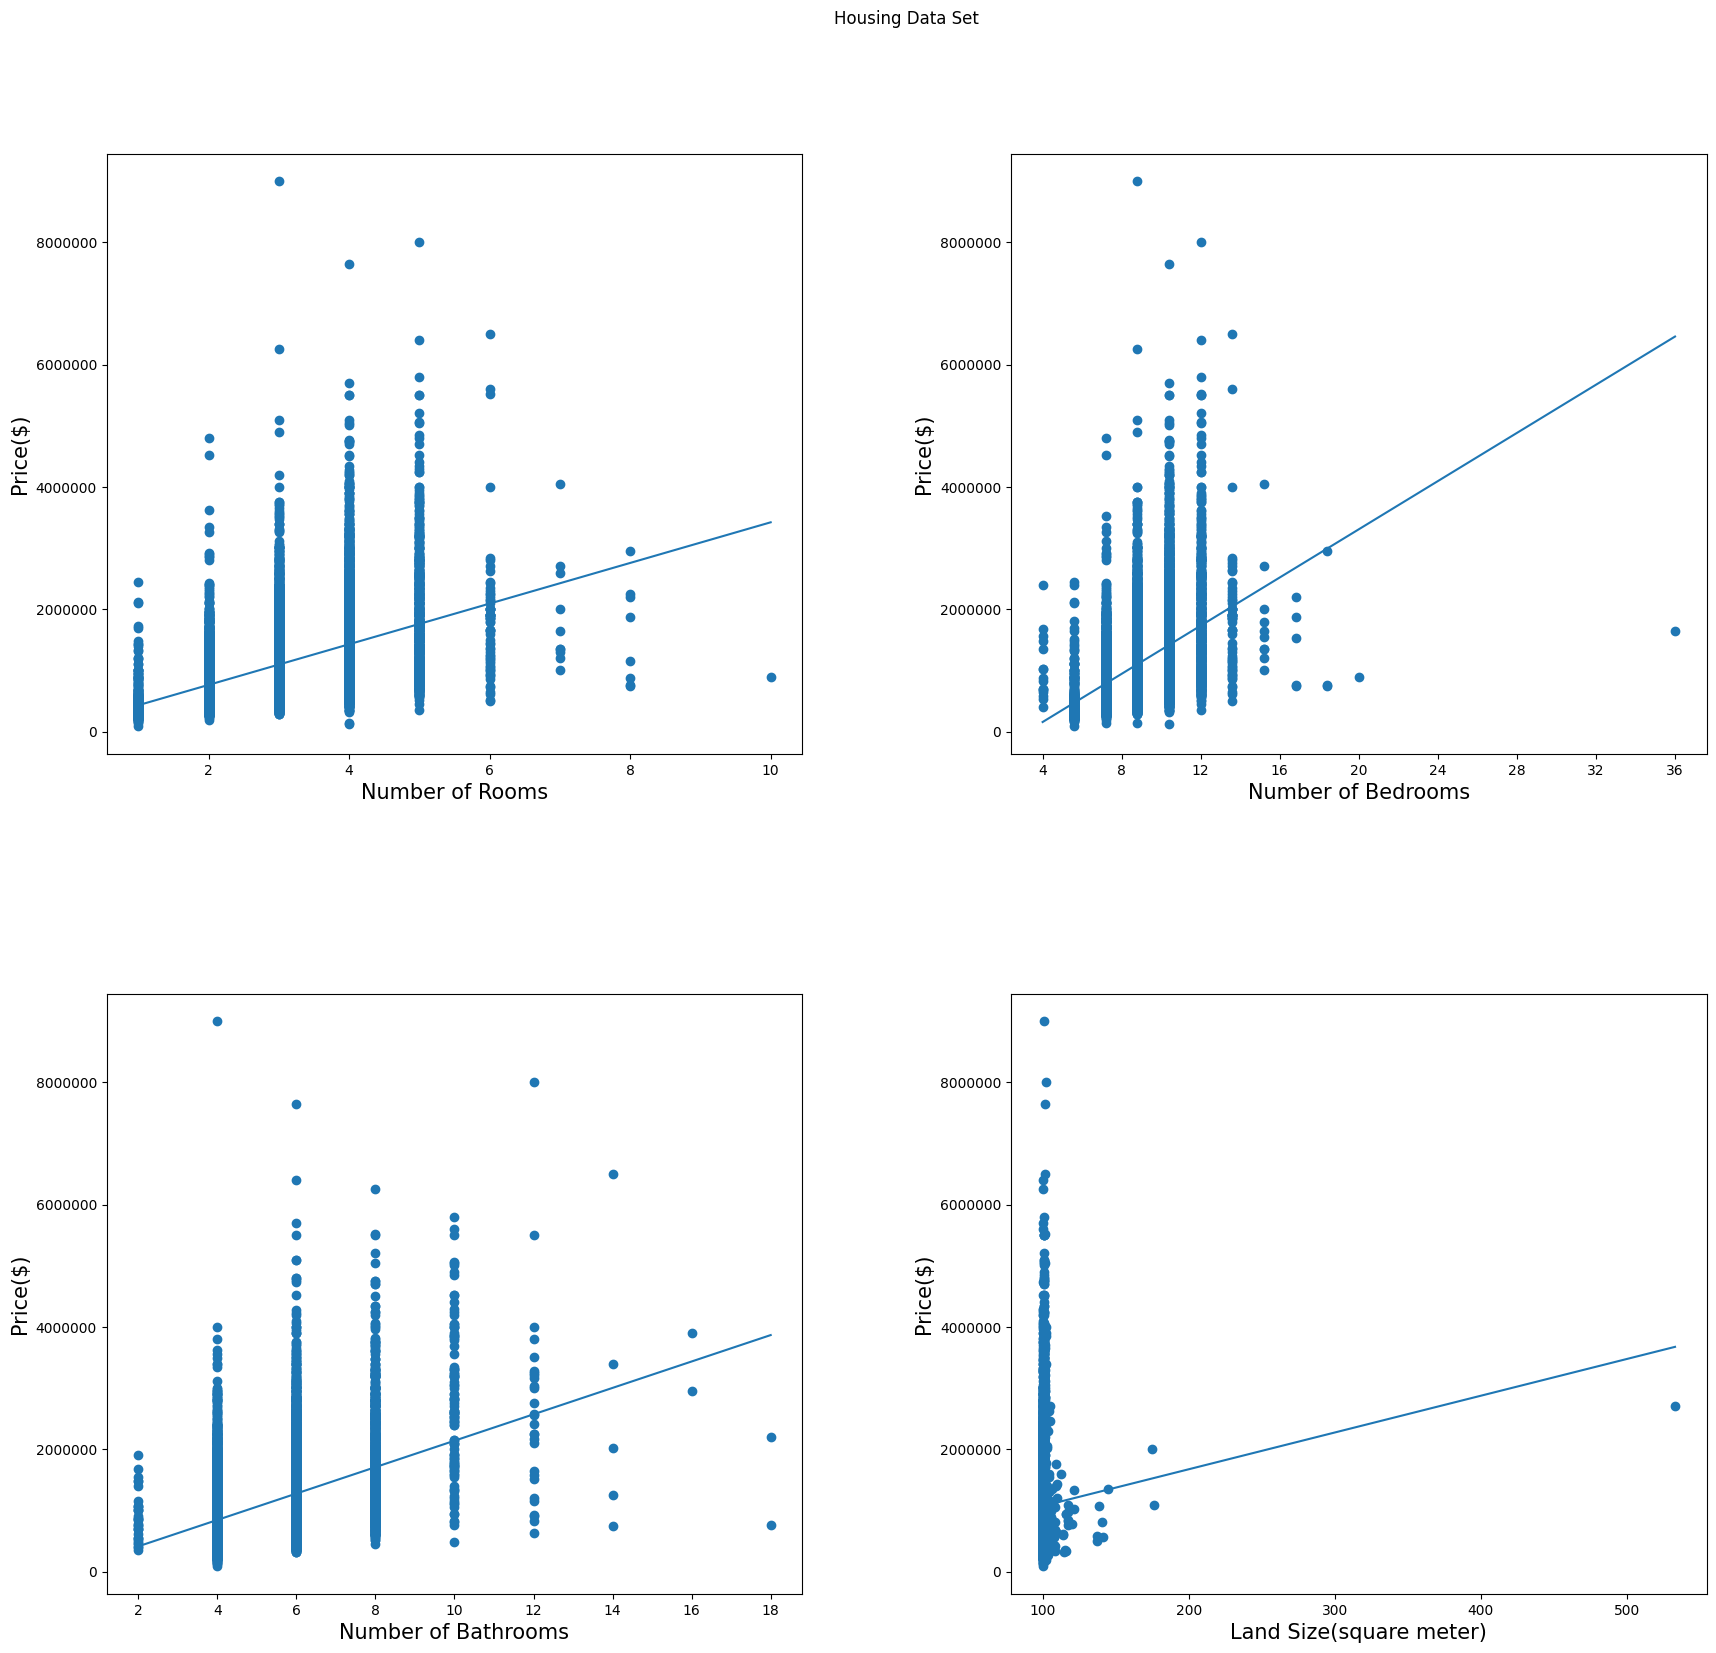

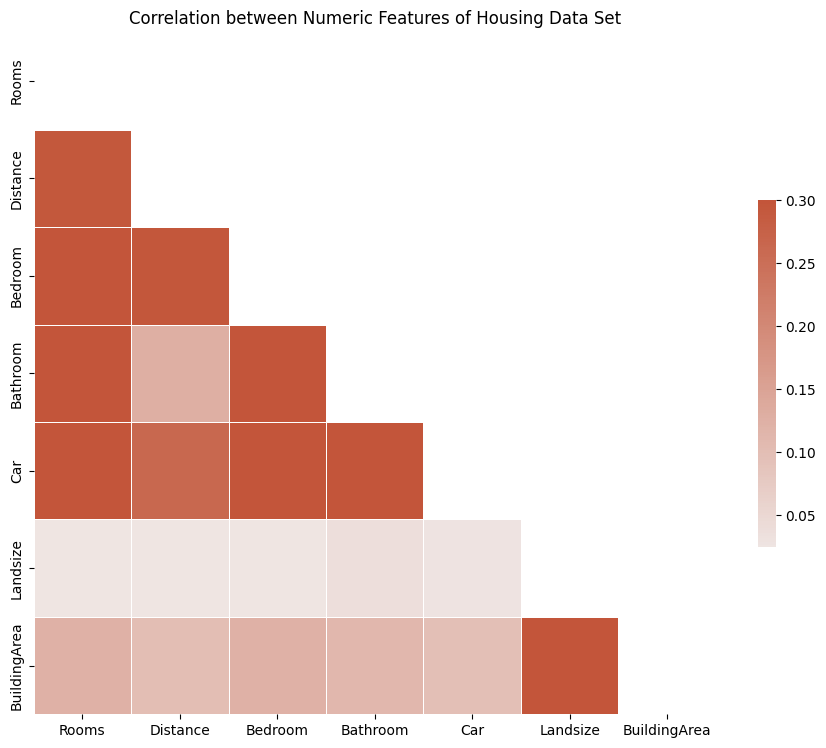

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from mlxtend.evaluate import bias_variance_decomp


#Load the "housing data" data set from GitHub
housing_data = pd.read_csv("https://raw.githubusercontent.com/Data-Vlad/Data-Science/main/Data%20622%20-%20Machine%20Learning%20and%20Big%20Data/Project%20%23%202/melb_data.csv")

#Print the first 10 records of each data set
print(housing_data)

#Print the meta data (the column names and data types) of the data set
print(housing_data.info())

#print the summary statistics for the data set
print(housing_data.describe())



#I will now create a grid of histograms to measure the distribution for the numeric values within the data set
#Number of Rooms
plt.subplot(3,3,1)
plt.hist(housing_data['Rooms'], bins = 15)
plt.xlabel('\nNumber of Rooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Price of House
plt.subplot(3,3,2)
plt.hist(housing_data['Price'], bins = 15)
plt.xlabel('\nPrice($)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.ticklabel_format(scilimits=(-5, 8),axis='x')
#Distance of House
plt.subplot(3,3,3)
plt.hist(housing_data['Distance'], bins = 15)
plt.xlabel('\nDistance(km)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.xticks(np.arange(0, 50, 5))
#Number of Bedrooms
plt.subplot(3,3,4)
plt.hist(housing_data['Bedroom'], bins = 15)
plt.xlabel('\nNumber of Bedrooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.xticks(np.arange(0, 20, 4))
#Number of Bathrooms
plt.subplot(3,3,5)
plt.hist(housing_data['Bathroom'], bins = 15)
plt.xlabel('\nNumber of Bathrooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Number of Car Spots
plt.subplot(3,3,6)
plt.hist(housing_data['Car'], bins = 15)
plt.xlabel('\nNumber of Car Spots\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Land Size
plt.subplot(3,3,7)
plt.hist(housing_data['Landsize'], bins = 15)
plt.xlabel('\nLand Size (square meter)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Building Area
plt.subplot(3,3,8)
plt.hist(housing_data['BuildingArea'], bins = 15)
plt.xlabel('\nBuilding Area (square meter)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,  top=0.9,   wspace=0.3,  hspace=0.4)
plt.suptitle('Housing Data Set')
plt.show()



#I will now create a grid of scatter plots to check if any relationship exists between the predictor variables against price of house
fig, ax = plt.subplots(2,2, figsize=(20,18))
#Number of Rooms
ax[0,0].scatter(housing_data['Rooms'],housing_data['Price'] , color='tab:blue')
ax[0,0].plot(np.unique(housing_data['Rooms']), np.poly1d(np.polyfit(housing_data['Rooms'], housing_data['Price'], 1))(np.unique(housing_data['Rooms'])))
ax[0,0].set_xlabel('Number of Rooms', fontsize=15)
ax[0,0].set_ylabel('Price($)', fontsize=15)
ax[0,0].ticklabel_format(scilimits=(-5, 7),axis='y')
#Number of Bedrooms
ax[0,1].scatter(housing_data['Bedroom'],housing_data['Price'] , color='tab:blue')
ax[0,1].plot(np.unique(housing_data['Bedroom']), np.poly1d(np.polyfit(housing_data['Bedroom'], housing_data['Price'], 1))(np.unique(housing_data['Bedroom'])))
ax[0,1].set_xlabel('Number of Bedrooms', fontsize=15)
ax[0,1].set_ylabel('Price($)', fontsize=15)
ax[0,1].ticklabel_format(scilimits=(-5, 7),axis='y')
ax[0,1].set_xticklabels(np.arange(0, 40, 4))
#Number of Bathrooms
ax[1,0].scatter(housing_data['Bathroom'],housing_data['Price'] , color='tab:blue')
ax[1,0].plot(np.unique(housing_data['Bathroom']), np.poly1d(np.polyfit(housing_data['Bathroom'], housing_data['Price'], 1))(np.unique(housing_data['Bathroom'])))
ax[1,0].set_xlabel('Number of Bathrooms', fontsize=15)
ax[1,0].set_ylabel('Price($)', fontsize=15)
ax[1,0].ticklabel_format(scilimits=(-5, 7),axis='y')
ax[1,0].set_xticklabels(np.arange(0, 20, 2))
#Land Size
ax[1,1].scatter(housing_data['Landsize'],housing_data['Price'] , color='tab:blue')
ax[1,1].plot(np.unique(housing_data['Landsize']), np.poly1d(np.polyfit(housing_data['Landsize'], housing_data['Price'], 1))(np.unique(housing_data['Landsize'])))
ax[1,1].set_xlabel('Land Size(square meter)', fontsize=15)
ax[1,1].set_ylabel('Price($)', fontsize=15)
ax[1,1].ticklabel_format(scilimits=(-5, 7),axis='y')
ax[1,1].set_xticklabels(np.arange(0, 900, 100))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,  top=0.9,   wspace=0.3,  hspace=0.4)
plt.suptitle('Housing Data Set')
plt.show()



# I will now create a correlation matrix to measure the degree of relationship between the predictor variables
numeric_correlation = housing_data[['Rooms', 'Distance','Bedroom', 'Bathroom', 'Car', 'Landsize','BuildingArea']]
d = pd.DataFrame(data=numeric_correlation , columns=list(numeric_correlation .columns))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sea.diverging_palette(230, 20, as_cmap=True)
sea.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between Numeric Features of Housing Data Set')
plt.show()



Histogram Subplots:
From the histogram subplots, we can tell that the: "Number of Rooms", "Number of Bedrooms" and "Number of Car Spots" features have a pretty much normal distribution. The "Distance" and "Price" features have a right-skewed distribution. It is also important to note that the "Land Size" and "Building Area" have a very similiar distribution.

Scatterplot Subplots:
From the scatterplot subplots, we can see that most of the predictor variables have a somewhat linear relationship with the "Price" response variable.

Correlation Matrix:
Upon creating the correlation matrix, we can see that the "Rooms" variable is highly correlated with the: "Car", "Bathroom", "Bedroom" and "Distance" variables. We can also see that the "Land Size" and "Building Area" fields are highly correlated. "Bedroom" and "Car" are highly correlated with "distance". "Bathroom" and "Car" are highly correlated with "Bedroom". To prevent overfitting, I will need to make sure,as much as possible, that the highly correlated features are not put in the same model. This will ensure robustness of the model. 



2). Model Building and Evaluation:

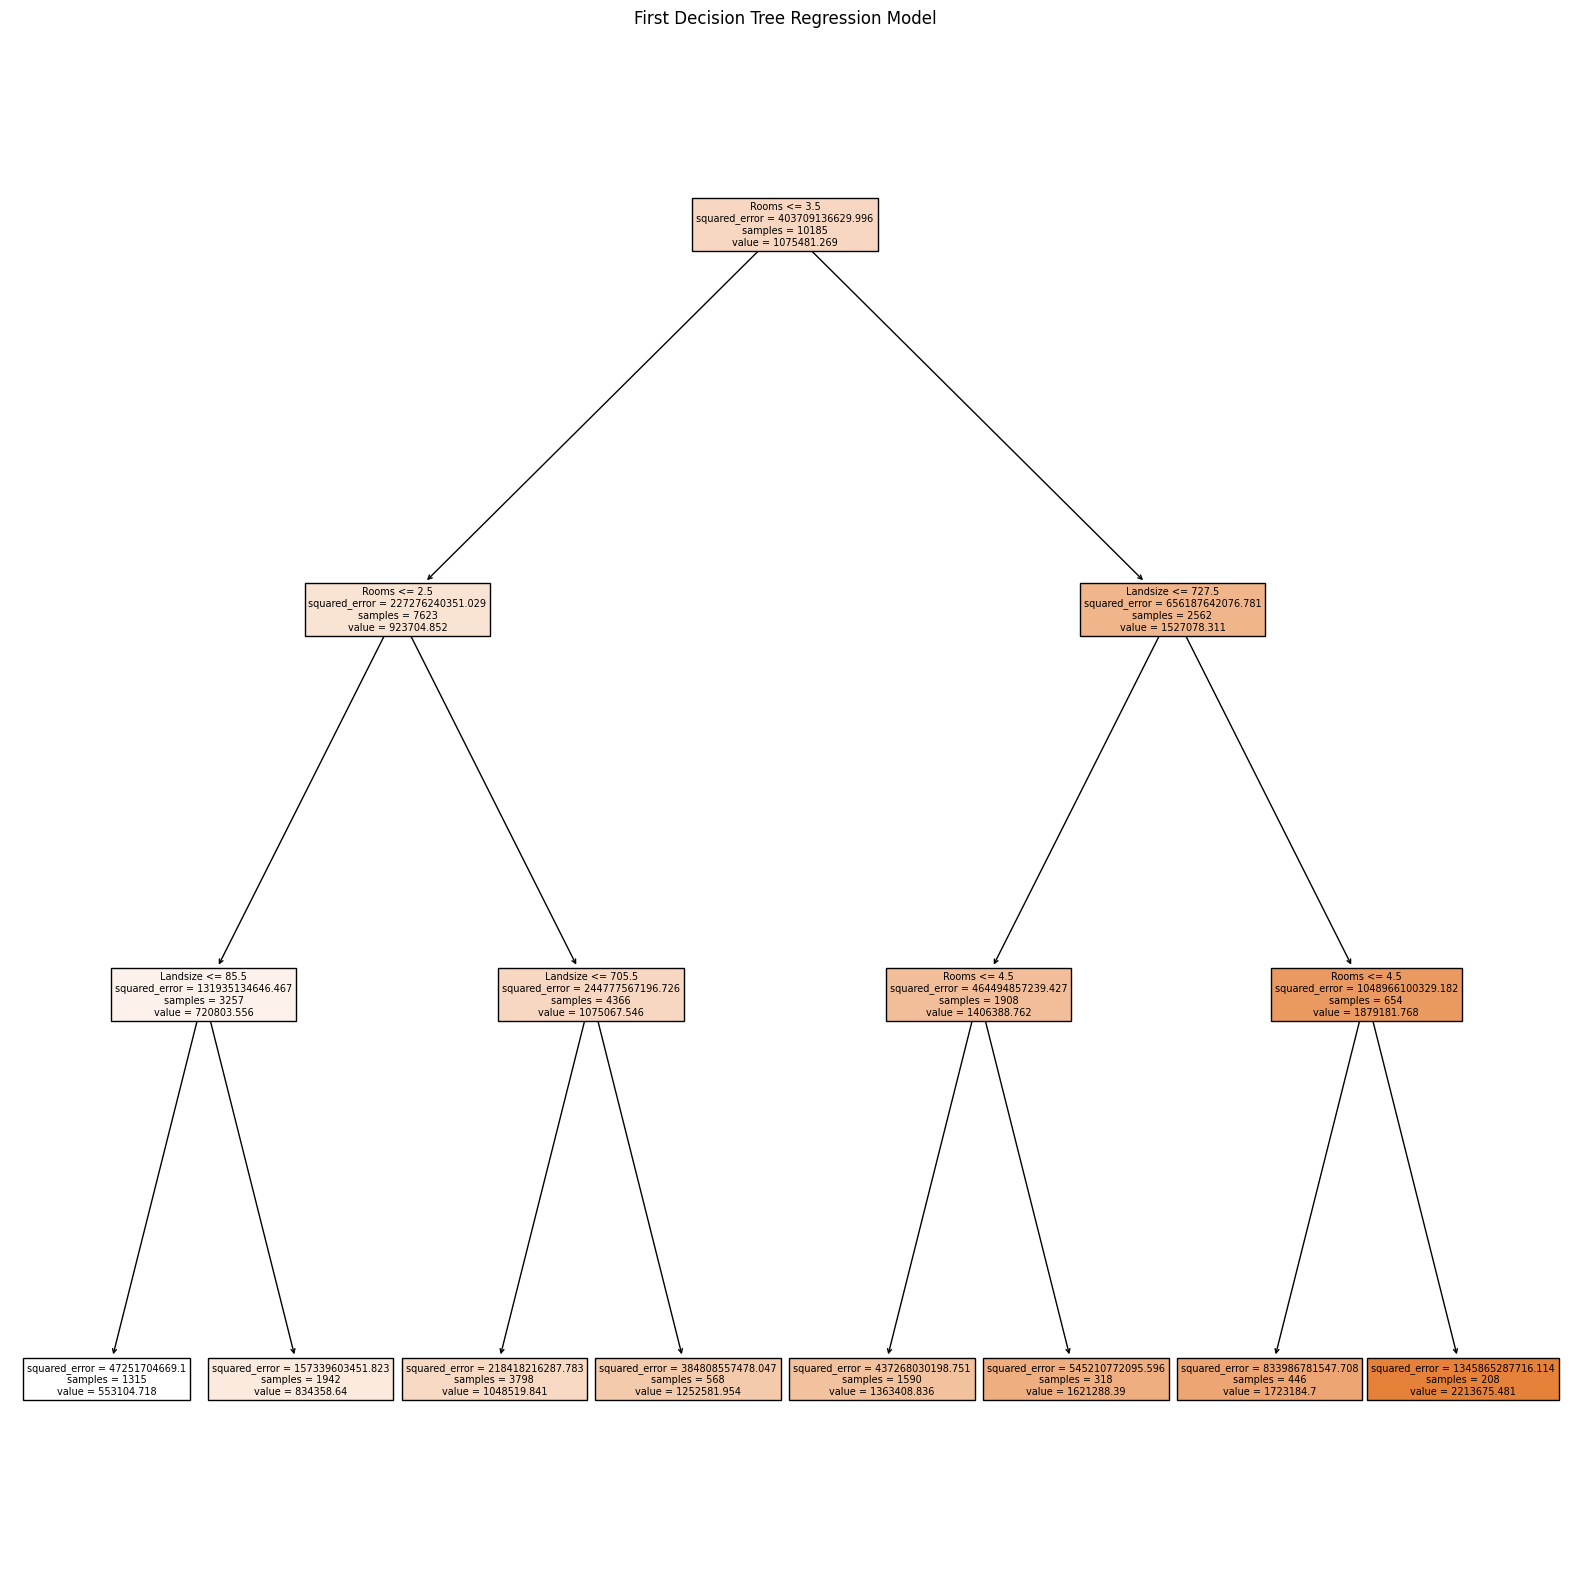

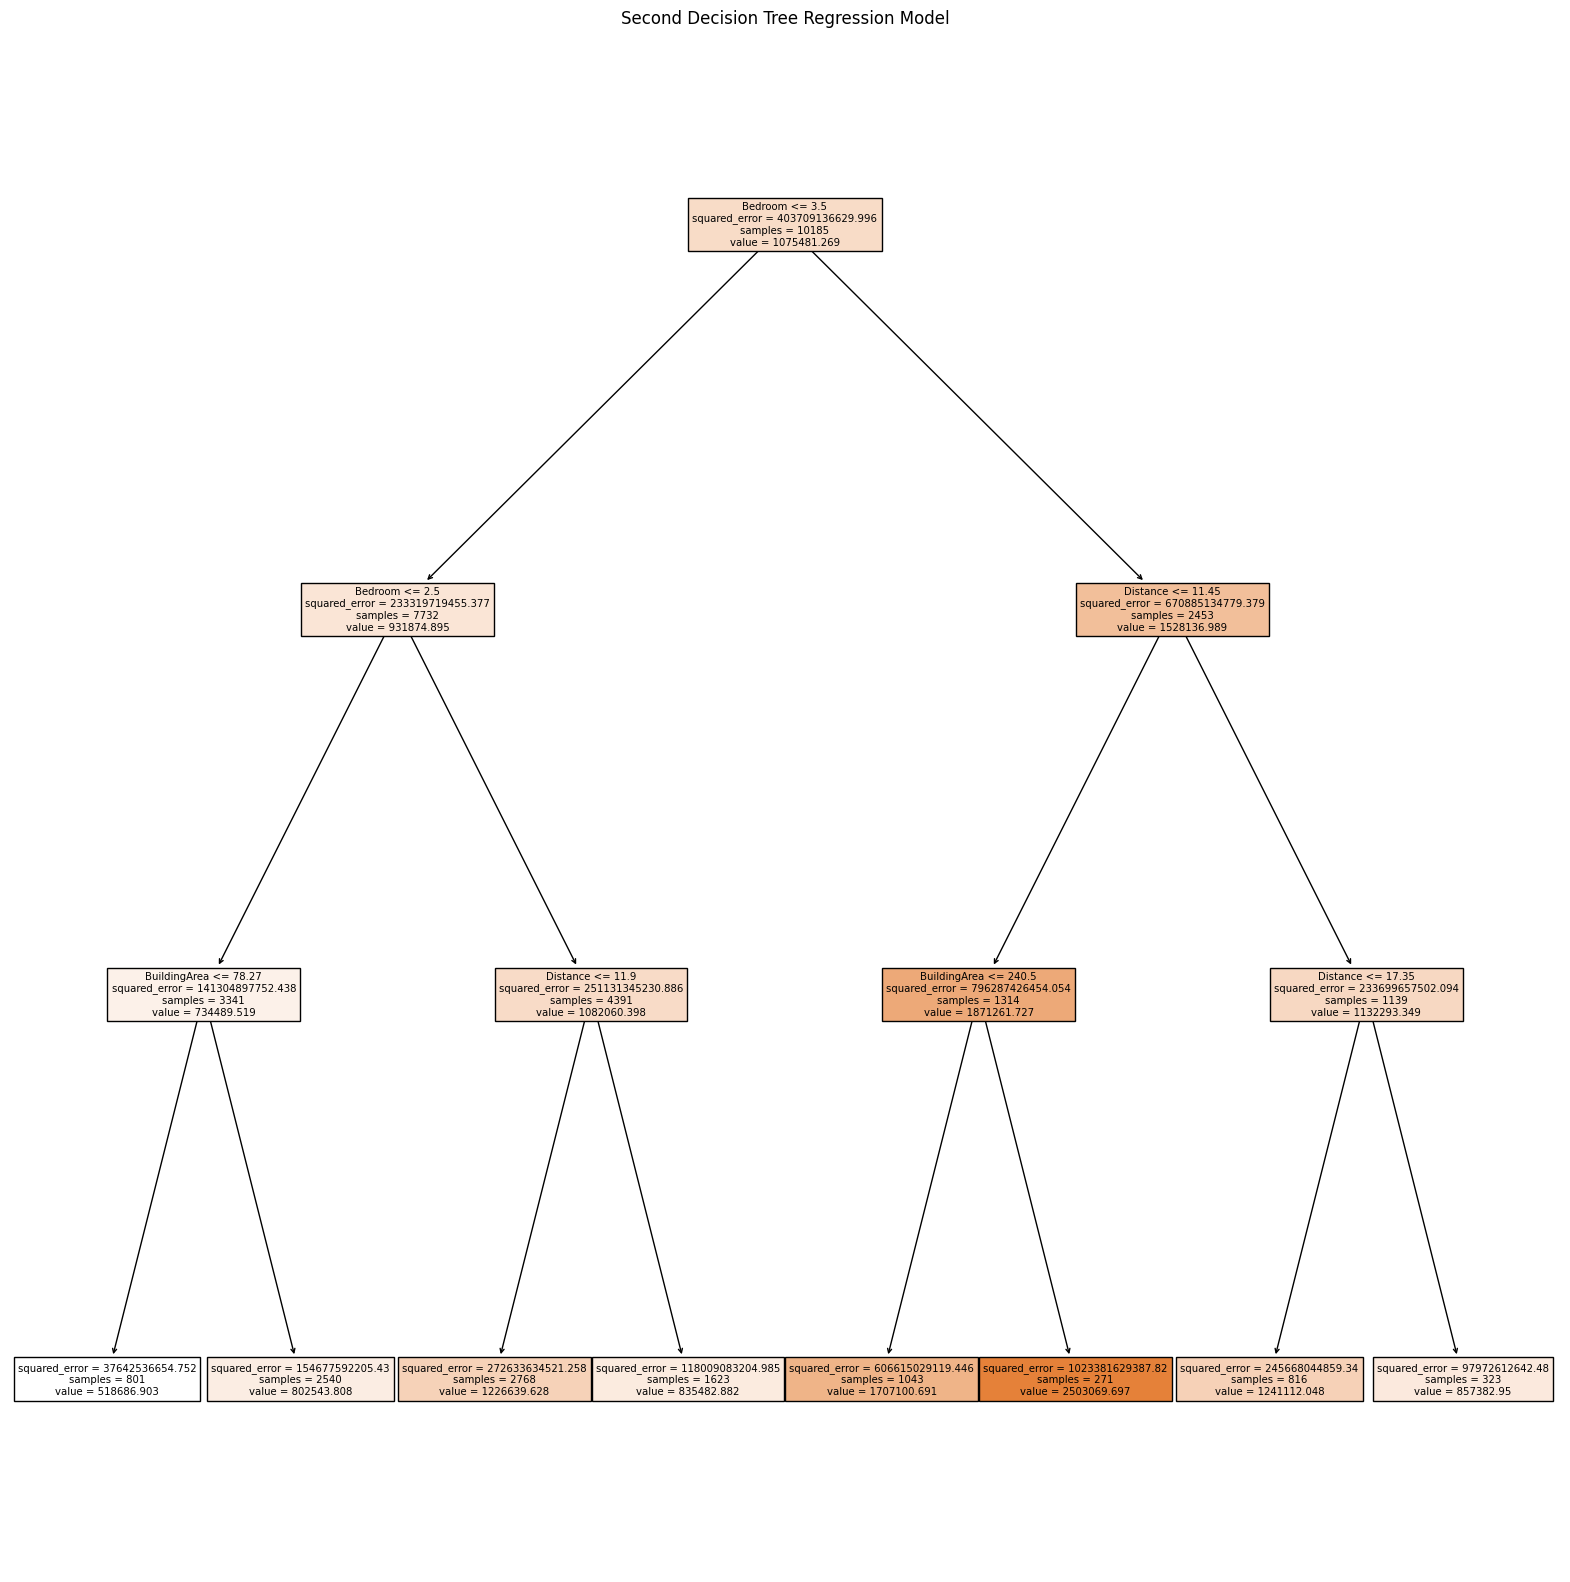

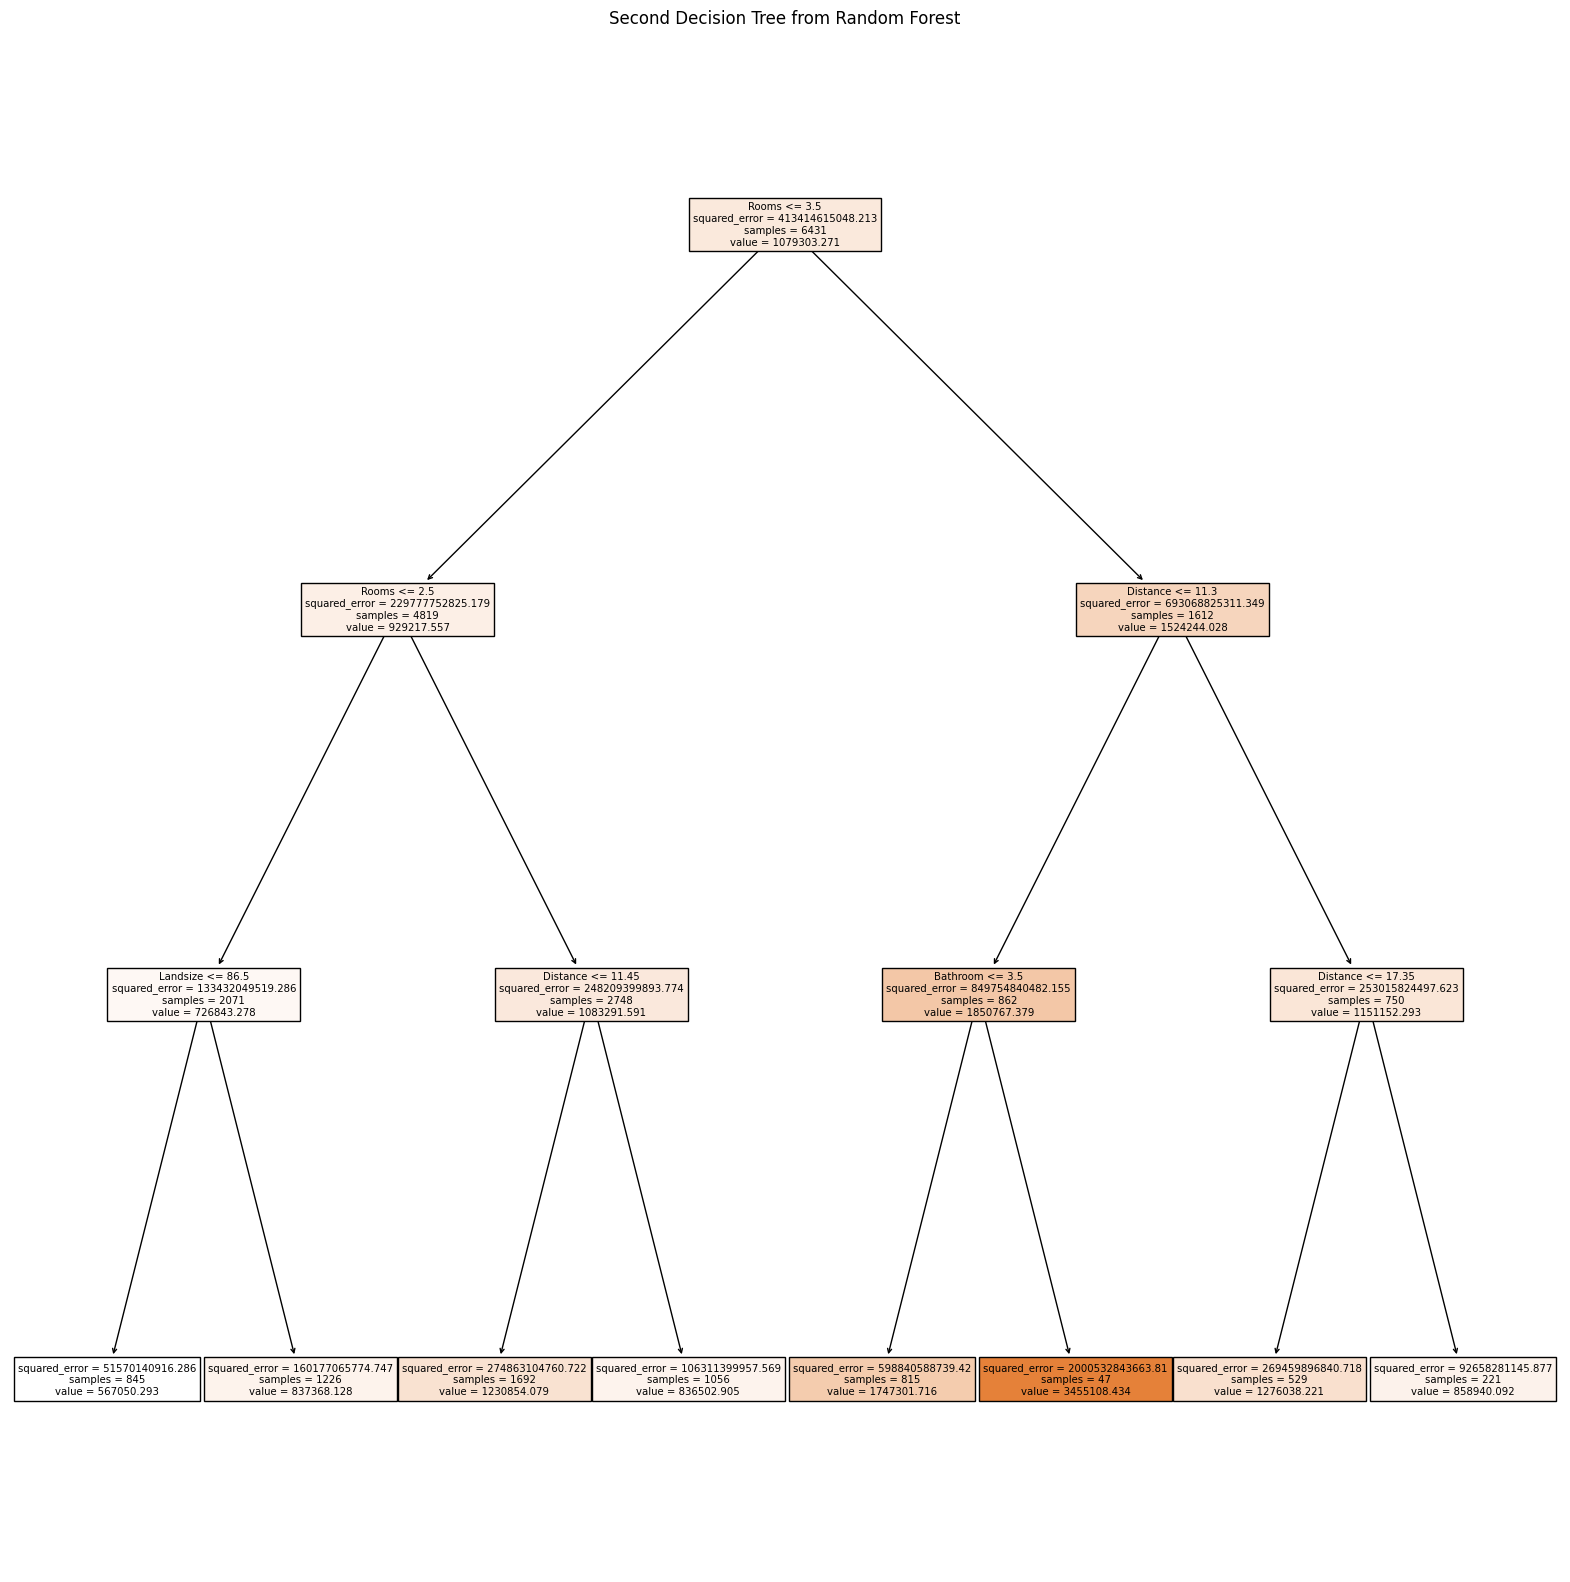

                        Model     Score               MSE              Bias  \
0  Decision Tree 1 Regression  0.251395  319197078859.645  315753693001.861   
1  Decision Tree 2 Regression  0.379917  263609435815.359  255889242283.700   
2    Random forest Regression  0.405697  252088541680.864  248067250571.178   

         Variance  
0  3443385857.784  
1  7720193531.660  
2  4021291109.686  


In [2]:

#FIRST DECISION TREE REGRESSION MODEL
# I will now create the first decsion tree between "price" (dependent variable) and the "Rooms", "Car" and "Landsize"(independent variables)
#Retreiving the independent(x) and dependent(price) variables from the housing data set
x=['Rooms','Car','Landsize']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model
dt1_model = DecisionTreeRegressor(random_state=0, max_depth=3)
dt1_model =dt1_model.fit(X_train,y_train)
#build the decision tree
fig=plt.figure(figsize=(20,20))  # customize according to the size of your tree
_=tree.plot_tree(dt1_model , feature_names = x ,filled=True)
plt.title("First Decision Tree Regression Model")
plt.show()
#retreiving the Score, Bias and Variance
#score
dt1_score=dt1_model.score(x_test,y_test)
#Bias and Variance
mse_dt1, bias_dt1, var_dt1 = bias_variance_decomp(dt1_model, X_train.values,y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1)
mse_dt1 =  '%.3f' % mse_dt1
bias_dt1 = '%.3f' % bias_dt1
var_dt1 =  '%.3f' % var_dt1


#SECOND DECISION TREE REGRESSION MODEL
#I will now create a second decsion tree between "price" (dependent variable) and "Distance","Bedroom" and "BuildingArea" (Independent variables)
#Retreiving the independent(x) and dependent(price) variables from the housing data set
x=['Distance','Bedroom','BuildingArea']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model
dt2_model = DecisionTreeRegressor(random_state=0, max_depth=3)
dt2_model =dt2_model.fit(X_train,y_train)
#build the decision tree
fig=plt.figure(figsize=(20,20))  # customize according to the size of your tree
_=tree.plot_tree(dt2_model , feature_names = x ,filled=True)
plt.title("Second Decision Tree Regression Model")
plt.show()
#retreiving the Score, Bias and Variance
#score
dt2_score=dt2_model.score(x_test,y_test)
#Bias and Variance
mse_dt2, bias_dt2, var_dt2 = bias_variance_decomp(dt2_model, X_train.values,y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1)
mse_dt2 =  '%.3f' % mse_dt2
bias_dt2 = '%.3f' % bias_dt2
var_dt2 =  '%.3f' % var_dt2



#RANDOM FOREST REGRESSION MODEL
# I will now create the first decsion tree from the Random Forest between "price" (dependent variable) and the "Rooms", "Distance","Bedroom", "Bathroom", "Car", "Landsize" and "Building Area" (independent variables)
#Retreiving the independent(x) and dependent(price) variables from the housing data set
x=['Rooms','Distance','Bedroom','Bathroom','Car','Landsize','BuildingArea']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model
rf_model =  RandomForestRegressor(max_depth=3,random_state=0)
rf_model =rf_model.fit(X_train,y_train)
#build the second decision tree from Random Forest
fig=plt.figure(figsize=(20,20))  # customize according to the size of your tree
_=tree.plot_tree(rf_model.estimators_[1] ,feature_names = x ,filled=True)
plt.title("Second Decision Tree from Random Forest")
plt.show()
#retreiving the Score, Bias and Variance
#score
rf_score=rf_model.score(x_test,y_test)
#Bias and Variance
mse_rf, bias_rf, var_rf = bias_variance_decomp(rf_model, X_train.values,y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1)
mse_rf =  '%.3f' % mse_rf
bias_rf = '%.3f' % bias_rf
var_rf =  '%.3f' % var_rf



#MODEL EVALUATION
# I will now create a table showing the Score as well as Bias and Variance of all three models for performance comparison purposes
models_comparison =pd.DataFrame({'Model':['Decision Tree 1 Regression','Decision Tree 2 Regression','Random forest Regression'],
                            'Score':[dt1_score,dt2_score,rf_score],
                            'MSE': [mse_dt1,mse_dt2,mse_rf],
                            'Bias':[bias_dt1,bias_dt2,bias_rf],
                            'Variance':[var_dt1,var_dt2,var_rf]
                           }) 
models_comparison.sort_values(by='Score',ascending=False)
print(models_comparison)




Essay:

Model Comparison Analysis -
I would first like to compare the score of the three models. The score indicates the model accuracy. The Random Forest Model has the highest score with: 40.5% followed by the Decision Tree 2 ---- 37.9% and the lowest performing model was Decision Tree 1 with a score of 25.1%. My belief is that one reason the second decision tree performed slightly better than the first one is because the predictor variables "Rooms" and "Cars" are very highly correlated and that might have caused slight overfitting bring the accuracy lower.The second model had predictor variables  were less correlated with one another which possibly gave the model more accuracy. It is of no surprise that the Random Forest model had the greatest accuracy. The reason being is that the Random Forest is an ensamble model, which combines the results of multiple decsion trees, thus giving it optimol accuracy.The Mean Squared Root error metric further validates the model score. It shows that Decision Tree 1 has the highest error (319197078859.645) and the Random Forest model has the lowest error (252088541680.864 ) with Decision Tree 2 being in the middle at (263609435815). Bias is the difference in average prediction of a model and the correct value which we want to predict. This means that a model which has high bias pays little attention to the training data and in consequence oversimlifies the model as a whole. This leads to low accuracy and makes the model more prone to error. Once again we can see that Decision Tree 1 has the highest Bias(315753693001.861), followed by Decsion Tree 2(255889242283.700 ) and Random Forest(248067250571.178) the lowest ---- having the highest accuracy. Variance indicates how data points are spread out from the mean as well as from one another. We see that Decsion Tree 1 has the least variance (3443385857.784) meaning the slightest change in data will affect it the least. The Random Forest will have the second highest variance(4021291109.686) with Decsion Tree 2 having the highest variance (7720193531.660). It looks like Decsion Tree 2 is the most sensitive out of all the models to changes in the training data. I would also like to point out the Bias-Variance tradeoff for the models. It looks like out of all the models, Decsion Tree 1 has the high bias and low variance (in comparison with the other models), indicating that it is way too simple with only a few predictor variables (underfit)----which is true. We see that the Decision Tree 2 has the highest variance to bias as compared to the other models, indicating that the data set is accurate but has the inclination to lead to overfitting to noisy training data. The Random Forest model also has a high Variance to Bias but this is most likely due to the fact that it is more complex in nature ---- having twice as much predictor variables as the other two models.

Aspects of Decsion Trees which need change - 
Based on the "bad & ugly" article, Decsion Trees have several disadvantages, which were evident in when I built the three models. The first issue is Usability. When many decsion trees are displayed at once, the tree becomes complicated and confusing to understand to the human eye. This was part of the reason why I only built trees to depth=3. Increasng the depth of the tree, I was barely able to see the numbers on the tree. Another disadvantage is that Decsion Trees take a lot of time/computing power. I noticed that the more branches (complexity) I added to the tree the slower it took to execute. It is very important to have a good interface and computing power to be able to clearly and quickly represent Decsion Trees with quite a few branches. I did not have the luxury of this so was able to clearly and quickly represnt the tree to depth=3. This is even more true when needing to add trees to a Random Forest for improved accuracy.